In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import psutil
import os
import cv2
#from tensorflow import keras
#from keras import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = x_train.astype('float32') / 255.0
#Converts pixels to a number from 0 - 1 to make reading more efficient

x_test = x_test.astype('float32') / 255.0
#Converts pixels to a number from 0 - 1 to make reading more efficient


x_train = x_train.reshape(60000, 28, 28, 1)
#(Batch_Size, X, Y, Channels) The channel we will use is 1 because it's a gray scale image

x_test = x_test.reshape(10000, 28, 28, 1)
#(Batch_Size, X, Y, Channels) The channel we will use is 1 because it's a gray scale image


In [5]:
#Creating a model with keras with a sequential algorithm
model = tf.keras.Sequential([

    tf.keras.Input(shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    #1st layer
    #Create a 2D Convolutional layer with 32 filters, with a 3x3 matrix, the activation 'relu' refers to introducing non linearity which is keeping only positive values from the matrix (not using zeros)
    #The image has 32 filters which means there are 32 maps so the amount of layers are 32 so the shape of the matrix is now (26, 26, 32), 32 representing the amount of layers
    #The reason why the matrix becomes (26, 26) is because with the 3x3 filter it cannot reach 26, 27, 28, so the max size of the array should be 26, in which the padding would be 0 for the image since 25th pixel contains the last "filtered" pixel.

    tf.keras.layers.MaxPooling2D(),
    #2nd layer
    # Reduces the Matrix size for down sampling by half the matrix size (26 / 2) = 13. Now we have a (13, 13, 32) and remember we have 32 filters currently applied, and keeps the most important features, this reduces computation.

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    #3rd layer
    #Now we apply 64 filters to the image, still with a 3x3 filter. The matrix will now decrease by 2 again so we will have (11, 11, 64)

    tf.keras.layers.MaxPooling2D(),
    #4th layer
    #We will then reduce the matrix size for down sampling by half the matrix size (11 / 2) = 5, now we have (5, 5, 64), and recall 64 represents the amount of filters applied for each channel, so we are
    #down sampling to have more of the important parts of the image so then we can efficiently, strongly, and uniquely identify the best probability of what the image would be.

    tf.keras.layers.Flatten(),
    #5th layer
    #we will now flatten turning our 3D matrix, into a 1D vector by doing the multiplication 5 * 5 * 64 = 1600, this is used so that the Dense layers expect a flat list of numbers.

    tf.keras.layers.Dense(128, activation='relu'),
    #6th layer
    #This layer is connecting every input number (1600), to every neuron (128). What the neuron does is take all the numbers from input applying its unique weighted sum such as the bias, and weights, then
    # we pass each neuron through a function such as we defined 'relu', which in summary filters negative numbers to become 0.
    # After the function is complete for each neuron, then each neuron will output a number which then will be used in the last layer.

    tf.keras.layers.Dense(10, activation='softmax')
    #7th layer
    #We are creating 10 neurons here, each neuron looks at the 128 numbers from the previous dense layer, each neuron creates a weighted combination of all 128 inputs to produce something called a "logit"
    # we don't interpret logits as probabilities so we use the softmax function to convert logits -> probabilities, so then we can understand what the most accurate outcome would be.
    # We will use 10 neurons to map to 10 classes because the numbers go from (0 - 9). So each neuron is responsible for one class.

])

In [ ]:

class MemoryUsageCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        ram = process.memory_info().rss / (1024 ** 2)  # in MB
        print(f" -> Epoch {epoch + 1}: RAM used = {ram:.2f} MB")


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, callbacks=[MemoryUsageCallback()])


loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

%time

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9032 - loss: 0.3068 -> Epoch 1: RAM used = 1333.96 MB
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 33ms/step - accuracy: 0.9032 - loss: 0.3067
Epoch 2/5
1811/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9838 - loss: 0.0498

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


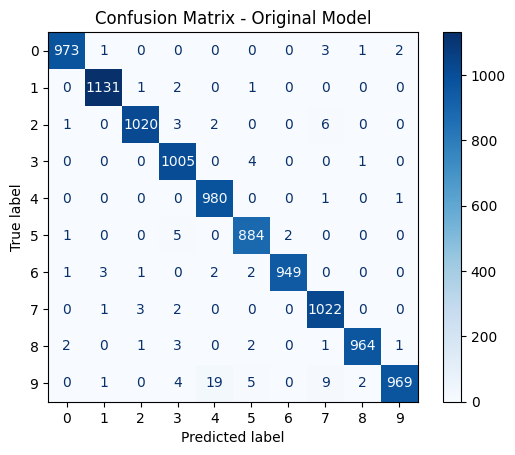

In [8]:
# Create confusion matrix to evaluate the performance of original model


#Load the Model into the program
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Original_Model.keras')

#The predicted probability distribution over all possible classes for each input
pred_probabilities = model.predict(x_test)


# Taking the highest probability (argmax) from each row
y_pred = np.argmax(pred_probabilities, axis=1)

# Create the 10x10 confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot!
display_matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))

# Plot with a blue color map
display_matrix.plot(cmap='Blues')

plt.title("Confusion Matrix - Original Model")
plt.show()


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

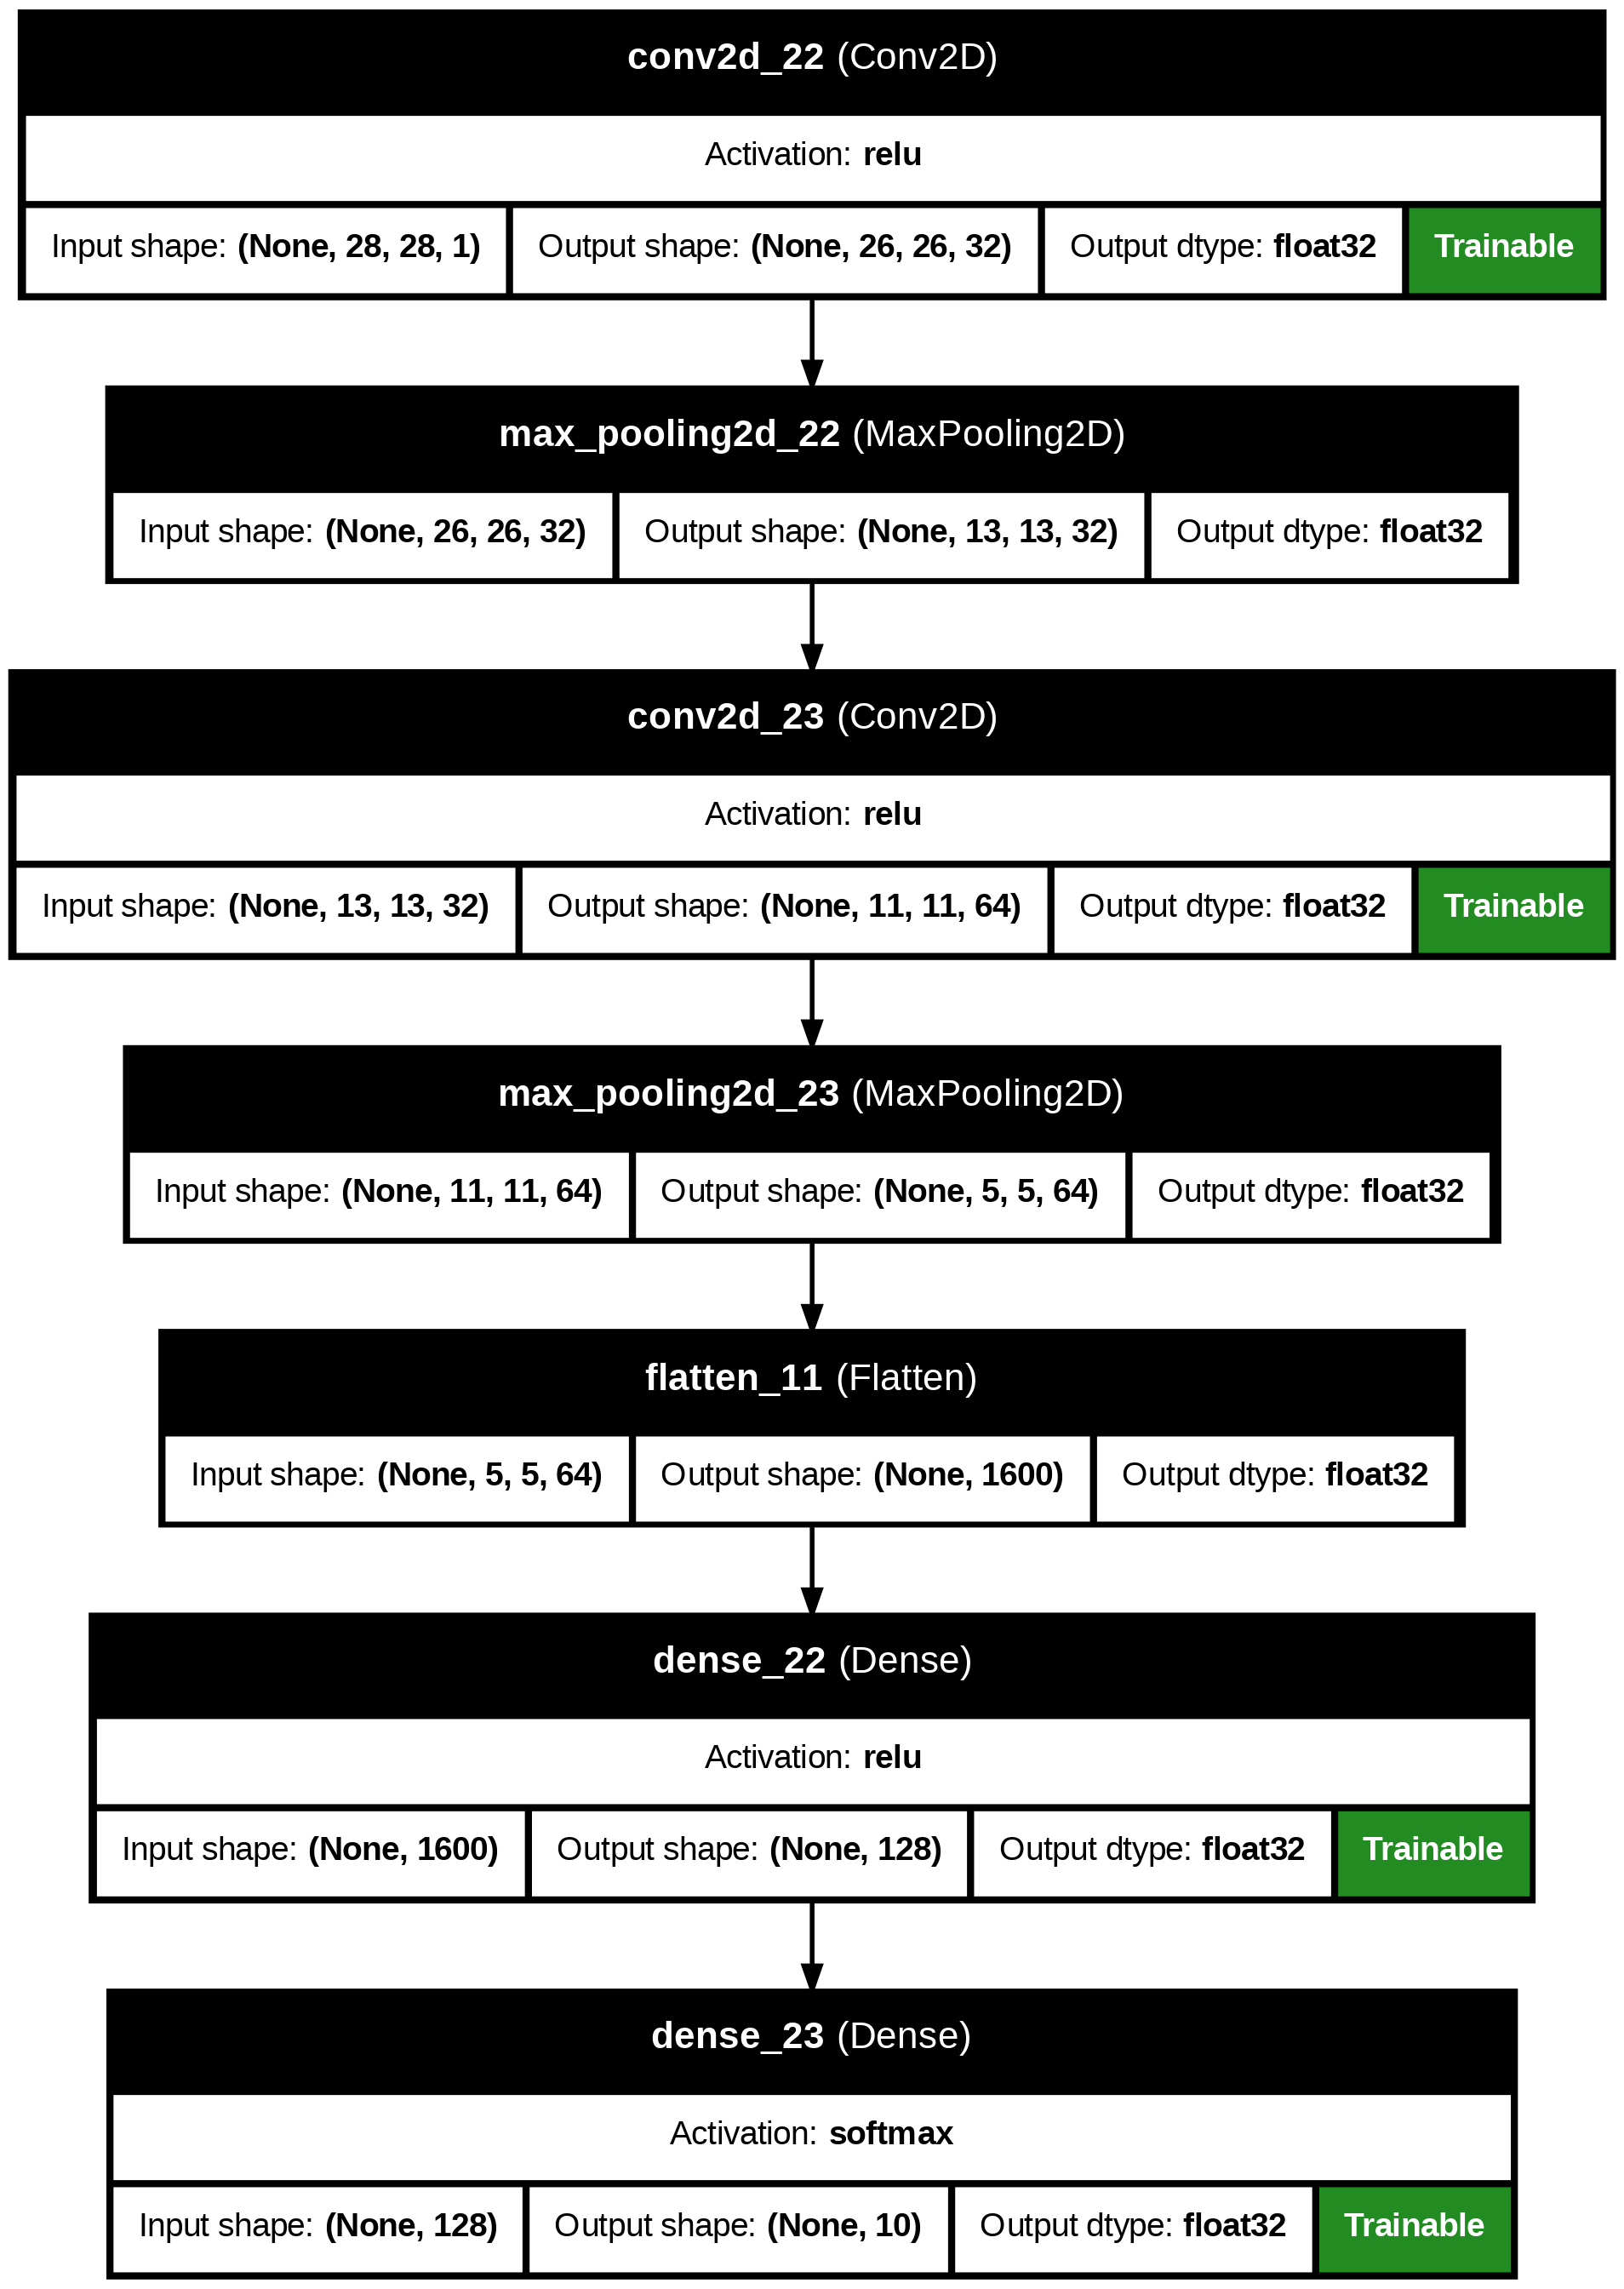

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=True,
)

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Original_Model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
<Sequential name=sequential_1, built=True>


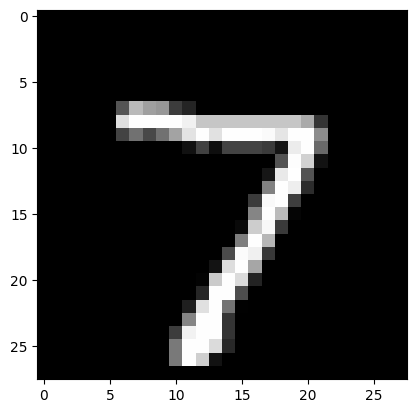

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Original_Model.keras')

img = x_test[0] # 7
img_tensor = np.expand_dims(img, axis=0).astype('float32')

# Expanding dimensions from (28, 28, 1) -> (1, 28, 28, 1) this is now batch shaped



_ = model.predict(img_tensor)


plt.imshow(img, cmap='gray')

print(model)


In [ ]:
def compute_smoothgrad(model, img_tensor, class_index=None, noise_level=0.1, num_samples=50): # Takes Model, img tensor (1, 28, 28, 1), noise level, and noisy samples or how many versions I want
    img_tensor = tf.convert_to_tensor(img_tensor) # Converts to image tensor, incase if haven't
    base_image = img_tensor[0] # This is the original image, removes the batch dimensions (28, 28, 1)
    accumulated_saliency = tf.zeros_like(base_image[..., 0]) # Will 0 all the indices in the matrix to 0's, and to remove the last dimension (channel), to 0, and create a black image. (28, 28)

    for i in range(num_samples): # Repeat num samples (50 times), to build a smooth map that will show "noticeable" features, the bigger the loop the more noticeable it becomes
        noise = tf.random.normal(shape=base_image.shape, stddev=noise_level) # Creates some random gaussian noise to the image
        noisy_img = tf.expand_dims(base_image + noise, axis=0) # Add the noise to the base image, and put it back into batch shape (1, 28, 28, 1)
        noisy_img = tf.Variable(noisy_img) # Convert into a variable so Tensorflow can see where the gradients are in the next step



        if i < 5:
          plt.imshow(noisy_img[0].numpy().squeeze(), cmap='gray')
          plt.title(f"Noisy Image #{i+1}")
          plt.show()


        with tf.GradientTape() as tape: # Start recording for automatic differentiation, which is the main algorithm for training neural networks
            predictions = model(noisy_img) # Run the model on the noisy image
            if class_index is None: # If you didn't specify which class (0 - 9, to have a stronger heatmap), the model is on then we will pick the class from the Dense(0 - 9) with the highest probability.
                class_index = tf.argmax(predictions[0])
            loss = predictions[:, class_index] # This will define the loss from the probability to the assigned predicted class

        grads = tape.gradient(loss, noisy_img) # Compute the gradient of the loss, under the noisy image, how much each pixel affects the output essentially for each class
        saliency = tf.abs(grads[0, ..., 0]) # Take the absolute value of the gradients, (negative values wont work)
        accumulated_saliency += saliency # Add this saliency to the total so that the image becomes more "noticeable" with the features

    smoothgrad = accumulated_saliency / num_samples # Now take the average of all the saliency maps to smooth the noise
    smoothgrad = (smoothgrad - tf.reduce_min(smoothgrad)) / (tf.reduce_max(smoothgrad) - tf.reduce_min(smoothgrad) + 1e-8) # Now we normalize the saliency map to 0 - 1 to make them easy to visualize, and add a small value in the denominator to prevent divisions by 0
    return smoothgrad.numpy() # Return the final smoothed gradient as a numpy array so we can plot it on matplotlib



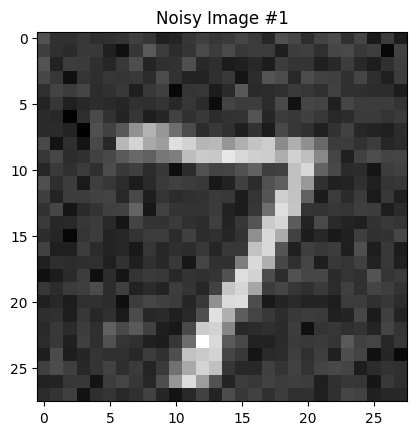

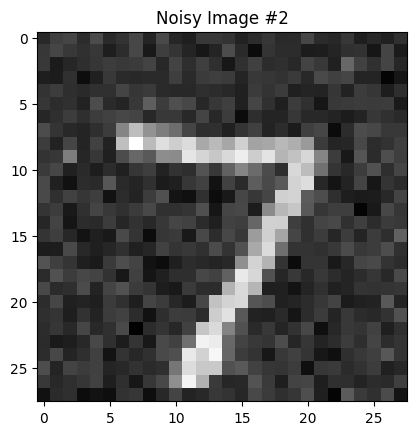

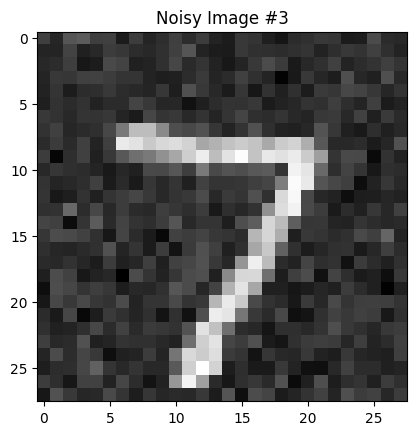

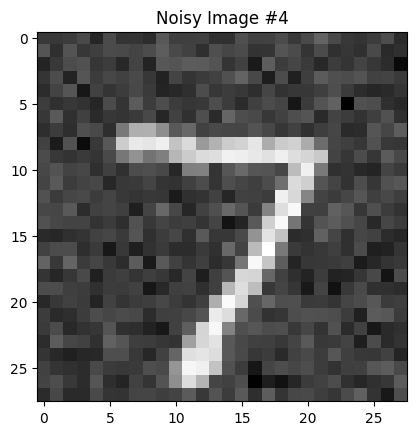

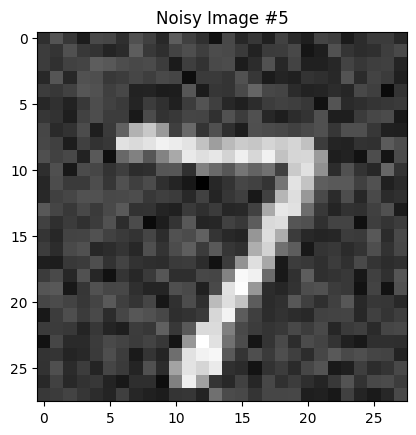

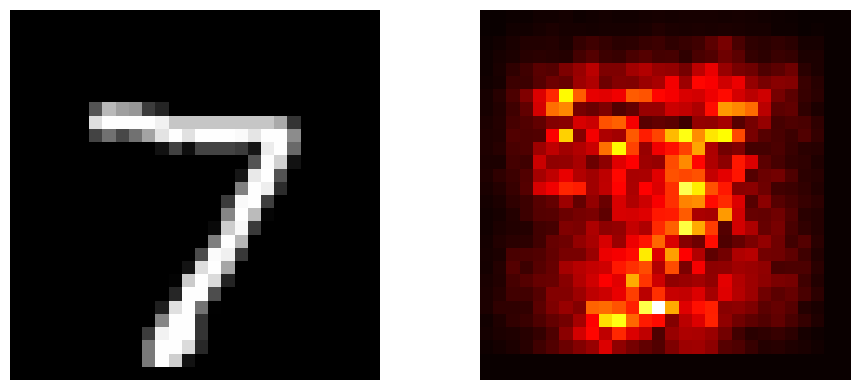

In [ ]:


smoothgrad_map = compute_smoothgrad(model, img_tensor) #Function to compute the smoothgrad

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(smoothgrad_map, cmap='hot') #Output the heatmap format
plt.axis(False)

plt.tight_layout()
plt.show()


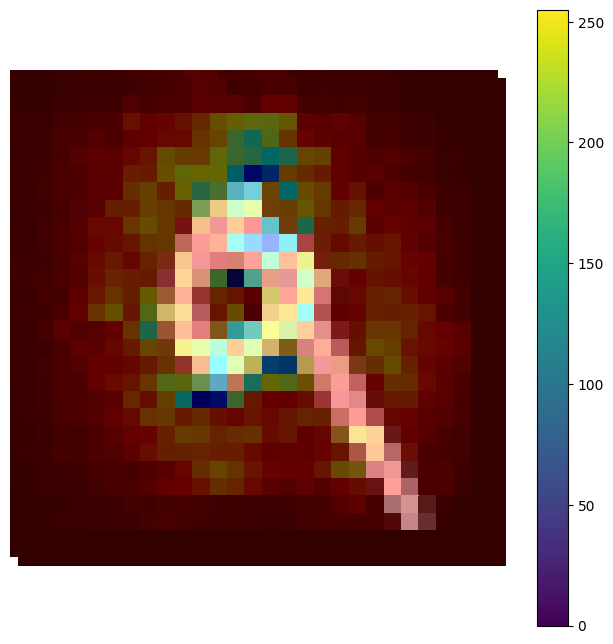

In [ ]:

heatmap_resized = cv2.resize(smoothgrad_map, (img.shape[1], img.shape[0])) #Resize the image to fix on top of each other


heatmap_resized = np.uint8(255 * heatmap_resized) #Include non gray features

heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET) #Apply a color map


img_rgb = np.repeat(img, 3, axis=-1)
img_rgb = np.uint8(255 * img_rgb)


superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_colored, 0.4, 0)


plt.figure(figsize=(8, 8))
plt.imshow(superimposed_img)


heatmap = plt.pcolor(superimposed_img)

plt.colorbar(heatmap)

plt.axis(False)
plt.show()

In [ ]:
# create quantized model for post-training quantization (ptq)

# load model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Original_Model.keras')

# export to SavedModel format (for TFLite)
#model.save('/content/drive/MyDrive/Colab Notebooks/saved_model_dir', save_format='tf')
model.export('/content/drive/MyDrive/Colab Notebooks/saved_model_dir')

# convert to quantized TFLite model
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Colab Notebooks/saved_model_dir')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

# save the quantized file as a tflite file
with open('/content/drive/MyDrive/Colab Notebooks/quantized_model.tflite', 'wb') as f:
    f.write(tflite_quant_model)

# load tflite model into an interpreter for inference
interpreter = tf.lite.Interpreter(model_content=tflite_quant_model)
interpreter.allocate_tensors()

# get info about the input and output tensors (e.g. shape, data type)
input_details = interpreter.get_input_details() # input shape should be (1, 28, 28, 1) for each input image
output_details = interpreter.get_output_details() # output shape should be (1, 10) for 0-9 digits

Saved artifact at '/content/drive/MyDrive/Colab Notebooks/saved_model_dir'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  136359223380112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223382032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223381456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223382224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223382800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223380880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223383184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136359223382992: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
%%time
# test quantized model

# number of correct predictions
correct = 0
# lists to store predicted and true labels
y_pred = []
y_true = []

# loop quantized model over testing data set (10,000 images)
for i in range(len(x_test)):
    input_data = np.expand_dims(x_test[i], axis=0).astype(input_details[0]['dtype']) # prepares each test image with the correct shape and data type. Orignal: (28, 28, 1) -> New: (1, 28, 28, 1). Adds new dimension at start (the batch size)
    interpreter.set_tensor(input_details[0]['index'], input_data) # assigns the input image to the model's input tensor. Now the model is ready to process the image
    interpreter.invoke() # triggers the inference process, model processes input and generates predictions
    output = interpreter.get_tensor(output_details[0]['index']) # retrieves model's predictions (from previous step) and stores it in array (shape (1, 10))

    pred_label = np.argmax(output) # get the index of the highest value from the output array, which is the model's predicted digit
    true_label = y_test[i] # store true value for each image

    # store predicted and true labels (for confusion matrix)
    y_pred.append(pred_label)
    y_true.append(true_label)

    if pred_label == true_label:
        correct += 1

accuracy = correct / len(x_test)
print(f"\nTFLite quantized model accuracy: {accuracy:.4f}")


TFLite quantized model accuracy: 0.9896
CPU times: user 1.44 s, sys: 3.74 ms, total: 1.44 s
Wall time: 1.44 s


In [ ]:
%%time

model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Original_Model.keras') #Load model into the program

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) #Compile the model



mm= model.evaluate(x_test, y_test, verbose=0) #Test the models accuracy
print(f"Original model accuracy: {mm[1]:.4f}")


Original model accuracy: 0.9897
CPU times: user 4.51 s, sys: 141 ms, total: 4.65 s
Wall time: 3.1 s


In [ ]:
# verify size reduction from original model to quantized model

original_model_path = "/content/drive/MyDrive/Colab Notebooks/Original_Model.keras"
quantized_model_path = "/content/drive/MyDrive/Colab Notebooks/Original_Model_dynamic_range.tflite"

original_size = os.path.getsize(original_model_path) / (1024**2)  # in MB
quantized_size = os.path.getsize(quantized_model_path) / (1024**2)  # in MB

print(f"Original model size: {original_size:.2f} MB")
print(f"Quantized model size: {quantized_size:.2f} MB")

Original model size: 2.61 MB
Quantized model size: 0.22 MB


In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/Original_Model.keras'
model = tf.keras.models.load_model(model_path)


converter_fp32 = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_fp32_model = converter_fp32.convert()


fp32_tflite_path = '/content/drive/MyDrive/Colab Notebooks/Original_Model_fp32.tflite'
with open(fp32_tflite_path, 'wb') as f:
    f.write(tflite_fp32_model)

converter_int8 = tf.lite.TFLiteConverter.from_keras_model(model)
converter_int8.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_int8_model = converter_int8.convert()

int8_tflite_path = '/content/drive/MyDrive/Colab Notebooks/Original_Model_weight_only.tflite'
with open(int8_tflite_path, 'wb') as f:
    f.write(tflite_int8_model)


size_fp32 = os.path.getsize(fp32_tflite_path) / 1024 / 1024
size_int8 = os.path.getsize(int8_tflite_path) / 1024 / 1024

print(f"TFLite model without quantization: {size_fp32:.2f} MB")
print(f"TFLite model with weight-only quantization: {size_int8:.2f} MB")
print(f"Reduction factor: {size_fp32/size_int8:.2f}x")

Saved artifact at '/tmp/tmpvx9h9m3s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132457733721360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732513168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732513744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732514320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732513552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732514896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732514512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132457732516048: TensorSpec(shape=(), dtype=tf.resource, name=None)
Saved artifact at '/tmp/tmprhhrb7zc'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28,

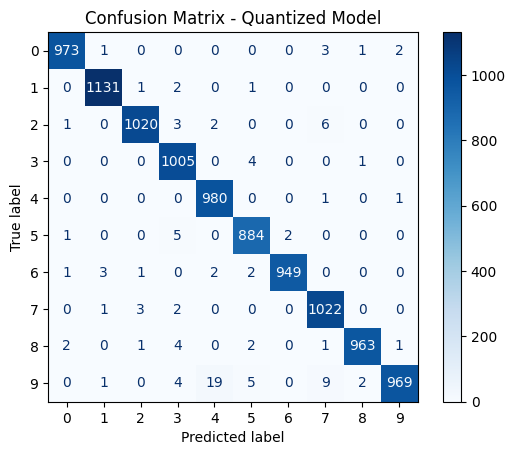

In [ ]:
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Quantized Model")
plt.show()

In [1]:
!pip install -q tensorflow
!pip install -q tensorflow-model-optimization
!pip uninstall -y keras

# !IMPORTANT THIS IS FOR WORKING WITH QUANTIZATION AWARE TRAINING! Restart Runtime block, and run the first 3 blocks including the Train/Test Data then run the below


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 27.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
import tensorflow_model_optimization as tfmot
import psutil
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import cv2
import matplotlib.pyplot as plt


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255.0
#Converts pixels to a number from 0 - 1 to make reading more efficient

x_test = x_test.astype('float32') / 255.0
#Converts pixels to a number from 0 - 1 to make reading more efficient


x_train = x_train.reshape(60000, 28, 28, 1)
#(Batch_Size, X, Y, Channels) The channel we will use is 1 because it's a gray scale image

x_test = x_test.reshape(10000, 28, 28, 1)
#(Batch_Size, X, Y, Channels) The channel we will use is 1 because it's a gray scale image


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Create model using that is not subclassed
model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax'),
    ]
)
#model.build(input_shape=(None, 28, 28, 1))

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Quantize aware version of the model
#print("module:", model.__class__.__module__)
#print(hasattr(model, '_is_graph_network'), getattr(model, '_is_graph_network', None))
#annotated = tfmot.quantization.keras.quantize_annotate_model(model)

# Creating the variable to quantize the model
quantize_model = tfmot.quantization.keras.quantize_model

#print(type(model))
quantize_aware_model = quantize_model(model)

# Recompile the quantize aware model
quantize_aware_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


class MemoryUsageCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        process = psutil.Process(os.getpid())
        ram = process.memory_info().rss / (1024 ** 2)  # in MB
        print(f" -> Epoch {epoch + 1}: RAM used = {ram:.2f} MB")





#quantize_aware_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split = 0.1)
quantize_aware_model.fit(x_train, y_train, epochs=5, callbacks=[MemoryUsageCallback()])


Epoch 1/5
1875/1875 [==============================] - 18s 6ms/step - loss: 0.1325 - accuracy: 0.9599
Epoch 2/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0449 - accuracy: 0.9860
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0301 - accuracy: 0.9911
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0235 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0167 - accuracy: 0.9949


In [6]:
%%time
loss, accuracy = quantize_aware_model.evaluate(x_test, y_test, verbose=0)
print(f"Quantize Aware Model Loss: {loss}")
print(f"Quantize Aware Model Accuracy: {accuracy}")

Quantize Aware Model Loss: 0.02496875263750553
Quantize Aware Model Accuracy: 0.9923999905586243
CPU times: user 1.38 s, sys: 163 ms, total: 1.55 s
Wall time: 1.56 s


In [7]:
quantize_aware_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer (QuantizeLa  (None, 28, 28, 1)         3         
 yer)                                                            
                                                                 
 quant_conv2d (QuantizeWrap  (None, 26, 26, 32)        387       
 perV2)                                                          
                                                                 
 quant_max_pooling2d (Quant  (None, 13, 13, 32)        1         
 izeWrapperV2)                                                   
                                                                 
 quant_conv2d_1 (QuantizeWr  (None, 11, 11, 64)        18627     
 apperV2)                                                        
                                                                 
 quant_max_pooling2d_1 (Qua  (None, 5, 5, 64)          1

In [8]:
quantize_aware_model.save('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model', save_format='tf')

In [9]:
quantized_aware_size = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model.keras') / (1024**2)  # in MB
print(f"Quantized Aware Model size: {quantized_aware_size:.2f} MB")

Quantized Aware Model size: 3.50 MB


In [10]:
# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model.tflite', 'wb') as f:
    f.write(tflite_model)

# Check model size
size = os.path.getsize('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model.tflite') / (1024 ** 2)
print(f"TFLite Quantized Model Size: {size:.2f} MB")

TFLite Quantized Model Size: 0.22 MB


In [11]:
# load tflite model into an interpreter for inference
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# get info about the input and output tensors (e.g. shape, data type)
input_details = interpreter.get_input_details() # input shape should be (1, 28, 28, 1) for each input image
output_details = interpreter.get_output_details() # output shape should be (1, 10) for 0-9 digits

In [12]:
%%time
# test quantized model

# number of correct predictions
correct = 0
# lists to store predicted and true labels
y_pred = []
y_true = []

# loop quantized model over testing data set (10,000 images)
for i in range(len(x_test)):
    input_data = np.expand_dims(x_test[i], axis=0).astype(input_details[0]['dtype']) # prepares each test image with the correct shape and data type. Orignal: (28, 28, 1) -> New: (1, 28, 28, 1). Adds new dimension at start (the batch size)
    interpreter.set_tensor(input_details[0]['index'], input_data) # assigns the input image to the model's input tensor. Now the model is ready to process the image
    interpreter.invoke() # triggers the inference process, model processes input and generates predictions
    output = interpreter.get_tensor(output_details[0]['index']) # retrieves model's predictions (from previous step) and stores it in array (shape (1, 10))

    pred_label = np.argmax(output) # get the index of the highest value from the output array, which is the model's predicted digit
    true_label = y_test[i] # store true value for each image

    # store predicted and true labels (for confusion matrix)
    y_pred.append(pred_label)
    y_true.append(true_label)

    if pred_label == true_label:
        correct += 1

accuracy = correct / len(x_test)
print(f"\nTFLite quantized model accuracy: {accuracy:.4f}")


TFLite quantized model accuracy: 0.9924
CPU times: user 2.8 s, sys: 7.45 ms, total: 2.81 s
Wall time: 5.88 s


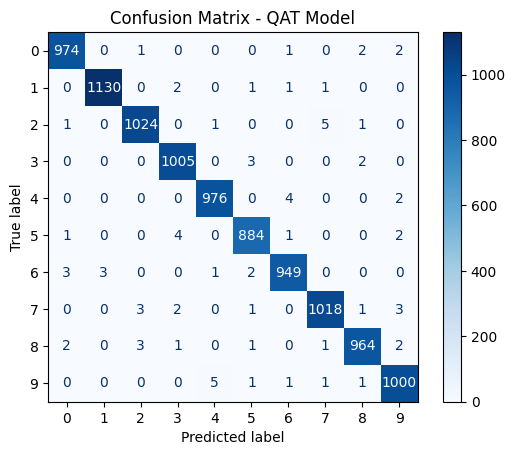

In [13]:
# confusion matrix

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - QAT Model")
plt.show()

1/1 [==============================] - 0s 257ms/step


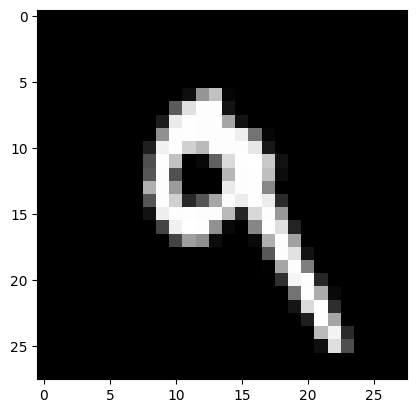

In [14]:
img = x_test[7] # 7
img_tensor = np.expand_dims(img, axis=0).astype('float32')

# Expanding dimensions from (28, 28, 1) -> (1, 28, 28, 1) this is now batch shaped



_ = model.predict(img_tensor)


plt.imshow(img, cmap='gray')

print(model)


In [16]:
def compute_smoothgrad(model, img_tensor, class_index=None, noise_level=0.1, num_samples=50): # Takes Model, img tensor (1, 28, 28, 1), noise level, and noisy samples or how many versions I want
    img_tensor = tf.convert_to_tensor(img_tensor) # Converts to image tensor, incase if haven't
    base_image = img_tensor[0] # This is the original image, removes the batch dimensions (28, 28, 1)
    accumulated_saliency = tf.zeros_like(base_image[..., 0]) # Will 0 all the indices in the matrix to 0's, and to remove the last dimension (channel), to 0, and create a black image. (28, 28)

    for i in range(num_samples): # Repeat num samples (50 times), to build a smooth map that will show "noticeable" features, the bigger the loop the more noticeable it becomes
        noise = tf.random.normal(shape=base_image.shape, stddev=noise_level) # Creates some random gaussian noise to the image
        noisy_img = tf.expand_dims(base_image + noise, axis=0) # Add the noise to the base image, and put it back into batch shape (1, 28, 28, 1)
        noisy_img = tf.Variable(noisy_img) # Convert into a variable so Tensorflow can see where the gradients are in the next step



        if i < 5:
          plt.imshow(noisy_img[0].numpy().squeeze(), cmap='gray')
          plt.title(f"Noisy Image #{i+1}")
          plt.show()


        with tf.GradientTape() as tape: # Start recording for automatic differentiation, which is the main algorithm for training neural networks
            predictions = model(noisy_img) # Run the model on the noisy image
            if class_index is None: # If you didn't specify which class (0 - 9, to have a stronger heatmap), the model is on then we will pick the class from the Dense(0 - 9) with the highest probability.
                class_index = tf.argmax(predictions[0])
            loss = predictions[:, class_index] # This will define the loss from the probability to the assigned predicted class

        grads = tape.gradient(loss, noisy_img) # Compute the gradient of the loss, under the noisy image, how much each pixel affects the output essentially for each class
        saliency = tf.abs(grads[0, ..., 0]) # Take the absolute value of the gradients, (negative values wont work)
        accumulated_saliency += saliency # Add this saliency to the total so that the image becomes more "noticeable" with the features

    smoothgrad = accumulated_saliency / num_samples # Now take the average of all the saliency maps to smooth the noise
    smoothgrad = (smoothgrad - tf.reduce_min(smoothgrad)) / (tf.reduce_max(smoothgrad) - tf.reduce_min(smoothgrad) + 1e-8) # Now we normalize the saliency map to 0 - 1 to make them easy to visualize, and add a small value in the denominator to prevent divisions by 0
    return smoothgrad.numpy() # Return the final smoothed gradient as a numpy array so we can plot it on matplotlib



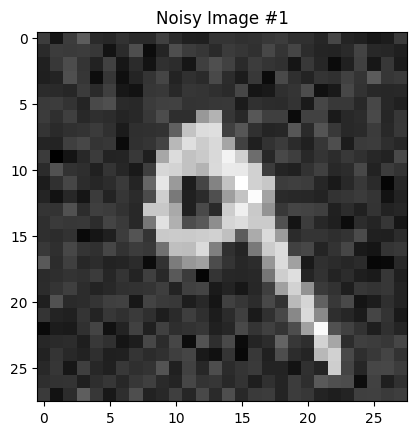

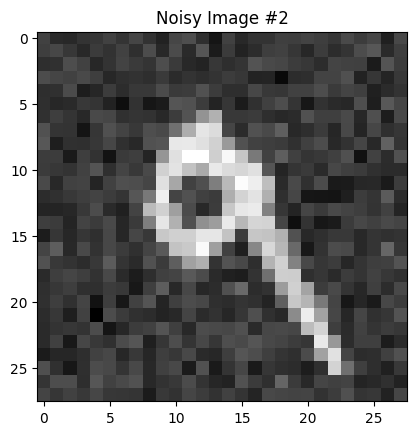

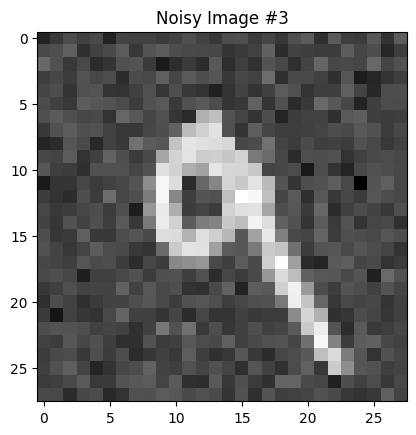

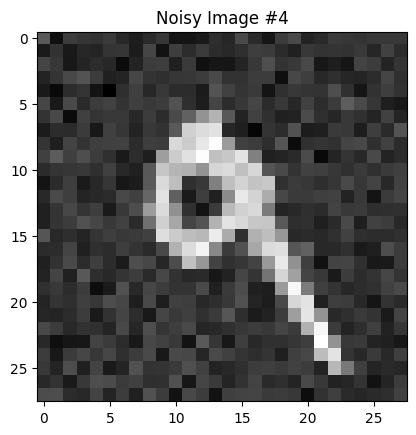

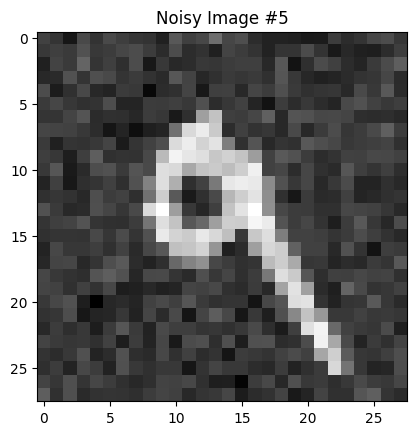

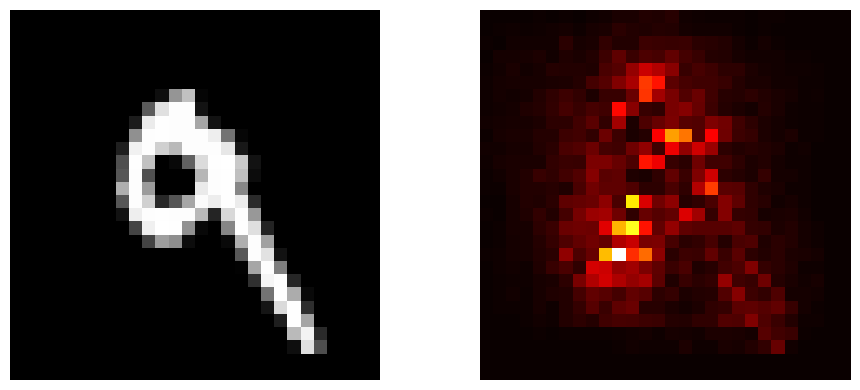

In [17]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Quantize_Aware_Model')


smoothgrad_map = compute_smoothgrad(model, img_tensor)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(img.squeeze(), cmap='gray')
plt.axis(False)

plt.subplot(1, 2, 2)
plt.imshow(smoothgrad_map, cmap='hot')
plt.axis(False)

plt.tight_layout()
plt.show()


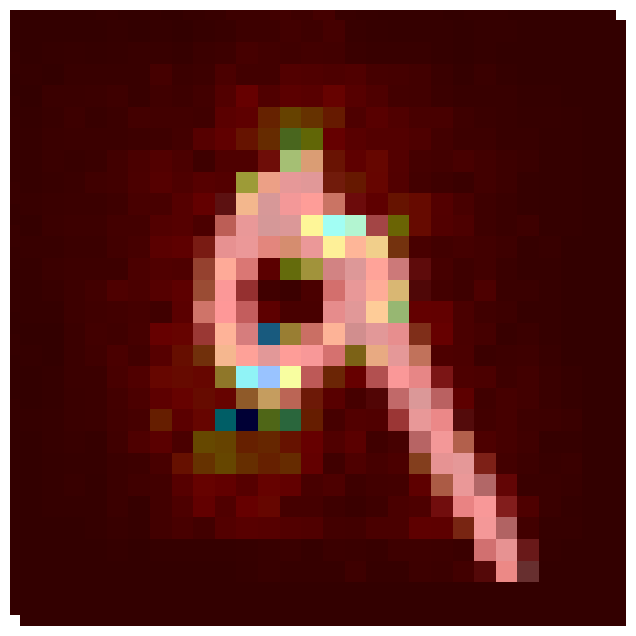

In [19]:

heatmap_resized = cv2.resize(smoothgrad_map, (img.shape[1], img.shape[0]))


heatmap_resized = np.uint8(255 * heatmap_resized)

heatmap_colored = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)


img_rgb = np.repeat(img, 3, axis=-1)
img_rgb = np.uint8(255 * img_rgb)


superimposed_img = cv2.addWeighted(img_rgb, 0.6, heatmap_colored, 0.4, 0)


plt.figure(figsize=(8, 8))
plt.imshow(superimposed_img)


heatmap = plt.pcolor(superimposed_img)

#plt.colorbar(heatmap)

plt.axis(False)
plt.show()